In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Q 1 and 2

In [2]:
# Inputs
n= 300
x = [[1,np.random.uniform(low =0, high = 1)] for i in range(n)]
# Vector Fields
v = [np.random.uniform(low =-0.1, high = 0.1, size = 1) for i in range(n)]
#v


# Q 3

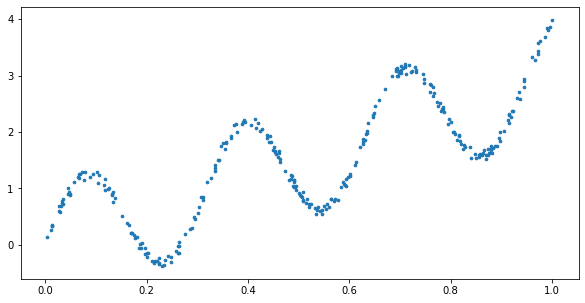

In [3]:
d = []
for i in range(0,n):
    d.append(sin(20*x[i][1]) + 3*x[i][1] + v[i][0])
d = np.asarray(d)
# d
fig, ax = plt.subplots(figsize = (10,5))
x = np.asarray(x)
#print(x)
plt.scatter(x[:,1],d, s  = 7)
plt.show()

In [4]:

# N = 24
# w = np.random.uniform(low = -1, high  = 1, size = 3*N + 1)
# #w

In [5]:
# Derivative of tanh(v)


def tanh_derivative(x):
    return 1-(tanh(x)**2)

In [6]:
# p = [[np.random.random(), np.random.random()] for i in range(1) for i in range(24)]
# p

In [7]:
# x =[[0,0],[0,1],[1,0],[1,1]]
# y=[0,1,1,0]
# x = np.asarray(x)
# y = np.asarray(y)
# x

In [23]:
def mse(x, d, w, nLayers, nNodes):
    c = 0
    n = len(x)
    for i in range(0,n):
        prev = x[i] 
            
        for j in range(nLayers):
            u =[]
            p =[]
            for k in range(nNodes):
                t = np.dot(w[j]['weights'][k], prev)
                u.append(t)
            for l in u:
                p.append(tanh(l))
            p.append(1)
            prev = np.asarray(p)
        y = np.dot(w[nLayers]["weights"][0], prev)
        c += (d[i] - y)**2
            
    return c/n


#np.random.seed(100)
class NeuralNetwork:
    
    def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000):
        self.data = x
        self.labels = y
        self.nLayers = numLayers
        self.nNodes = numNodes
        self.numOutputs = numOutputs
        self.eta = eta
        self.maxIt = maxIter
        #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
        self.weights = [{"weights":np.random.rand(numNodes, len(x[0]))}] #create the weights from the inputs to the first layer
        for i in range(self.nLayers-1):
            self.weights.append({"weights":np.random.rand(numNodes,numNodes)}) #create the random weights between internal layers
            
        if self.nLayers > 0:
            
            self.weights.append({"weights":np.random.rand(numOutputs,numNodes+1)}) #create weights from final layer to output node
        self.outputs = np.zeros(y.shape)
    


        
        
    def train(self):
        print(self.weights)
        #print(mse(self.data, self.labels, self.weights, self.nLayers, self.nNodes))
#         print(f)
        t = self.weights
        obj =[]
        epoch = []
        e = 0
        epoch.append(e)
        obj.append(mse(self.data, self.labels, self.weights, self.nLayers,self.nNodes))
        cos = 100000000
        
        while e < self.maxIt:
            prev = cos
            for i in range(len(self.data)):
                self.backprop(self.labels[i], self.data[i], self.weights, self.nLayers, self.nNodes) 
                for m in range(len(self.weights)):
                    for j in range(len(self.weights[m]['weights'])):
                        for k in range(len(self.weights[m]['weights'][j])):
                            self.weights[m]['weights'][j][k] -= self.eta *self.weights[m]['g'][j][k]


            cos = mse(self.data, self.labels, self.weights, self.nLayers,self.nNodes)
            if cos > prev:
                self.eta = 0.9*self.eta
                obj =[]
                epoch = []
                e = 0
                epoch.append(e)
                self.weights = t
                obj.append(mse(self.data, self.labels, t, self.nLayers,self.nNodes))
                cos = 100000000
                prev = 0

            elif cos <= prev:
                e += 1
                epoch.append(e)
                obj.append(cos)
                #print(g)

        return self.weights, obj, epoch    
       
    def predict(self,x=[]):
        prev = x
        for j in range(self.nLayers):
            l = []
            s = []
            for m in range(self.nNodes):
                s.append(np.dot(self.weights[j]["weights"][m], prev))
            for k in s:
                l.append(tanh(k))
            prev = np.asarray(l)
        s =[]
        l.append(1)
        prev = np.asarray(l)
        p = np.dot(self.weights[self.nLayers]["weights"][0], prev)
        s.append(p)
        q = tanh(p)
        return q

    def feedforward(self, data, weights, nLayers, nNodes):
        r =[]
        prev = data
        r.append(prev)
        t =[]

        for j in range(nLayers):
            l = []
            s = []
            for m in range(nNodes):
                s.append(np.dot(weights[j]["weights"][m], prev))
            
            for k in s:
                l.append(tanh(k))
            prev = np.asarray(l)
            t.append(s)
            r.append(l)
            
        s =[]
        l.append(1)
        p = np.dot(weights[nLayers]["weights"][0], l)
        s.append(p)
        #p = sigmoid(p)
        t.append(s)        
        
        return t,r

    def backprop(self, d, data, weights, nLayers, nNodes):
        der = []
        t,r = self.feedforward(data, weights, nLayers, nNodes)
        #print(r)      
        q = self.predict(data)
        
        for i in range(nLayers):
            a =[]
            for m in range(nNodes):
                a.append(tanh_derivative(t[i][m]))
            der.append(a)
        
        diff = []
        s =[]
        s.append(tanh_derivative(t[nLayers][0]))
        diff.append(d - q)
        der.append(s)
        for i in reversed(range(len(weights))):
            layer = weights[i]
            errors = []
            if i != len(weights)-1:
                for j in range(len(layer['weights'])):
                    error = 0
                    
                    for k in range(len(weights[i + 1]['weights'])):
                        error = (weights[i + 1]['weights'][k][j] * weights[i + 1]['s'][k])
                    errors.append(error)
            else:
                errors.append(diff[0])
            layer['s'] = []
            for j in range(len(layer['weights'])):
                layer['s'].append(errors[j]*der[i][j])
        print(self.weights)
        print(f)
        for j in range(len(weights)):
            layer = self.weights[j]
            layer['g'] = []
            for k in range(len(self.weights[j]['weights'])):
                s =[]
                for m in range(len(self.weights[j]['weights'][k])):
#                     print('\n')
#                     print('i = '+ str(i))
#                     print(m)
#                     print(self.weights[j]['weights'][k])
#                     print('r = ' +str(r))
#                     print((r[0][m]))
                    s.append(((-(r[j][m])*self.weights[j]['s'][k]))/len(self.data))
                layer['g'].append(s)

        return 0.0

In [24]:
nLayers = 1
nNodes = 24
nOut = 1
eta = 1
iter = 1000
w, obj ,epoch = NeuralNetwork(x,d, nLayers, nNodes, nOut, eta, iter).train()

[{'weights': array([[0.98869561, 0.75406104],
       [0.60339483, 0.54862983],
       [0.11141423, 0.26980292],
       [0.77167643, 0.33560416],
       [0.31678584, 0.32711943],
       [0.91436295, 0.81108247],
       [0.44915035, 0.57046957],
       [0.28142452, 0.61893577],
       [0.35099718, 0.23644328],
       [0.41750344, 0.22090034],
       [0.42119898, 0.34205635],
       [0.82442997, 0.88022968],
       [0.00913586, 0.76391869],
       [0.7793325 , 0.44463777],
       [0.20758495, 0.2549585 ],
       [0.89077553, 0.45009391],
       [0.64553005, 0.32598453],
       [0.04077072, 0.74829224],
       [0.22990128, 0.65581663],
       [0.08288862, 0.42740288],
       [0.13120442, 0.86908597],
       [0.76297659, 0.57445197],
       [0.37934872, 0.92580534],
       [0.53667885, 0.26942406]])}, {'weights': array([[0.7830465 , 0.7082986 , 0.20454435, 0.4318944 , 0.24648772,
        0.17575667, 0.72923678, 0.78089157, 0.16010368, 0.73350525,
        0.05490969, 0.63286527, 0.33453213, 

NameError: name 'f' is not defined

In [14]:
cos = mse(x, d, w, 1,24)
cos

24.794226145093983

# Q 4

In [15]:
def feedforward(data, weights, nLayers, nNodes):
    n =[]
    for i in range(len(data)):
        #print(i)
        prev = data[i]

        for j in range(nLayers):
            l = []
            s = []
            for m in range(nNodes):
                s.append(np.dot(weights[j]["weights"][m], prev))

            for k in s:
                l.append(tanh(k))
            prev = np.asarray(l)

        l.append(1)
        p = np.dot(weights[nLayers]["weights"][0], l)  
        #print(p)
    
        n.append(p)
    return n

In [16]:
y = feedforward(x, w, 1, 24)

# Plot: the number of epochs vs the MSE in the backpropagation algorithm.

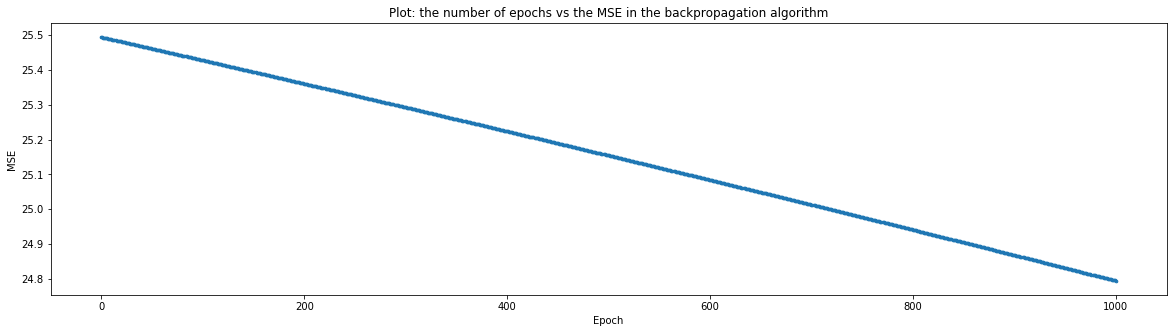

In [17]:

fig, ax = plt.subplots(figsize = (20,5))
plt.scatter(epoch,obj, s  = 7)
plt.plot(epoch,obj)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title('Plot: the number of epochs vs the MSE in the backpropagation algorithm')
plt.show()

# Q 5

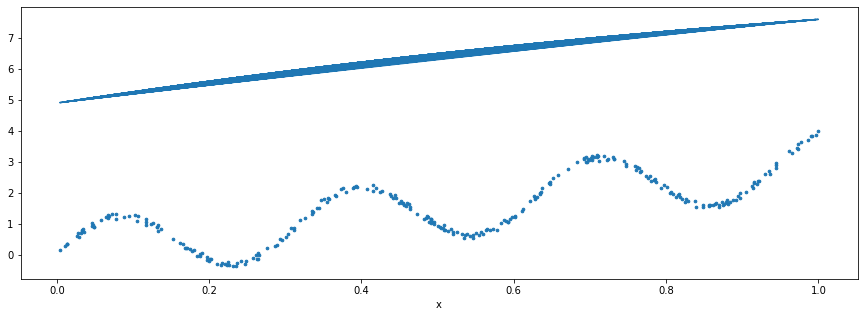

In [18]:
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(x[:,1],d, s  = 7)
plt.plot(x[:,1],y)
plt.xlabel("x")
plt.show()

In [35]:
# # Forward Propagation

# def forw_prop(w, x, n, N):
#     u = []
#     p = []
#     j = 0
#     while j < 3*N and len(p)<24:
#         u.append((w[j+1]*x)+w[j])
#         p.append(tanh((w[j+1]*x)+w[j]))
#         j += 2
#     sum  = 0
#     #print(p)
#     for k in range(len(p)):
#         sum += w[j+k] * p[k]
#     y = sum + w[3*N]
    
#     return y,u

In [36]:
# y,u = forw_prop(w0,x[1],n, N)
# print(y)
# print(d[0])
# print(u)

In [17]:
# #Back Propagation
# def back_prop(d,x,w, n, N):
#     g =[]
#     y, u = forw_prop(w, x, n, N)
#     diff = d - y
#     i = 0
#     j = 0
#     while i < 3*N+1:
#         if i % 2 == 0 and i < 48:
#             m = -(der(u[j])*w[48+j])*diff
#             #print(m)
#             g.append(m)
#         elif i % 2 != 0 and i < 48:
#             g.append(-(der(u[j])*w[48+j])*diff)
#             j += 1
#         elif i >= 48 and i < 3*N + 1:
#             g.append(-diff)
#         else:
#             g.append(-diff)
#         i += 1
    
#     g = np.asarray(g)
#     return (2*g)/n

In [18]:
# g = back_prop(d[2],x[2], w, n, N)
# w = w - 0.45*g
# y,u = forw_prop(w,x[2],n, N)
# print(y)
# print(d[0])
# print(u)

In [19]:
# def alg(x, d, w, lr, n, N, iter):
#     t = w
#     obj =[]
#     epoch = []
#     e = 0
#     epoch.append(e)
#     obj.append(mse(x, d, w, n,N))
#     cos = 100000000
#     while e < iter:
#         prev = cos
#         i = 0
#         while i < len(x):
#             g = back_prop(d[i], x[i], w, n, N)
#             w =  w - lr*g
#             i += 1
#         cos = mse(x, d, w, n,N)
#         if cos > prev:
#             lr = 0.9*lr
#             obj =[]
#             epoch = []
#             e = 0
#             epoch.append(e)
#             obj.append(mse(x, d, t, n,N))
#             cos = 100000000
            
#         elif cos <= prev:
#             e += 1
#             epoch.append(e)
#             obj.append(mse(x, d, w, n,N))
#             #print(g)
#     return w, obj, epoch

In [20]:
# w0, cf, epoch= alg(x,d,w,1, n,N, 500)

In [21]:


# def forw_prop1(w, x, n, N):
#     y =[]
#     u = []
#     for i in range(0,n):
#         p = []
#         j = 0
#         while j < 3*N and len(p)<24:
#             u.append((w[j+1]*x[i])+w[j])
#             p.append(tanh((w[j+1]*x[i])+w[j]))
#             j += 2
#         sum  = 0
#         #print(p)
#         for i in range(len(p)):
#             sum += w[j+i] * p[i]
#         y.append(sum + w[3*N])

#     y = np.asarray(y)
#     return y

In [22]:
# # Fit 

# y = forw_prop1(w0,x,n,N)
# #print(y)


In [23]:
# #np.random.seed(100)
# class NeuralNetwork:

#     #Do not change this function header
#     def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000):
#         self.data = x
#         self.labels = y
#         self.nLayers = numLayers
#         self.nNodes = numNodes
#         self.numOutputs = numOutputs
#         self.eta = eta
#         self.maxIt = maxIter
#         #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
#         self.weights = [{"weights":[[np.random.random(), np.random.random()] for i in range(len(x[0])) for i in range(numNodes)]}]
#         for i in range(self.nLayers-1):
#             self.weights.append({"weights":[[np.random.random(), np.random.random()] for i in range(numNodes) for i in range(numNodes)]}) 
            
#         if self.nLayers > 0:
            
#             self.weights.append({"weights":[[np.random.random() for i in range(numNodes+numOutputs)] for i in range(numOutputs)]}) 
#         self.outputs = np.zeros(y.shape)
    

#     def mse(x, d, w, n,N):
#         c = 0
#         u = []
#         for i in range(0,n):
#             p = []
#             j = 0
#             while j < 3*N and len(p)<24:
#                 u.append((w[j+1]*x[i])+w[j])
#                 p.append(tanh((w[j+1]*x[i])+w[j]))
#                 j += 2
#             sum  = 0
#             #print(p)
#             for k in range(len(p)):
#                 sum += w[j+k] * p[k]
#             y = sum + w[3*N]
#             c += (d[i] - y)**2
            
#         return c/n

        
        
#     def train(self):
#         print(self.nNodes)
#         print(self.weights)
#         t = self.weights
#         print(f)
#         obj =[]
#         epoch = []
#         e = 0
#         epoch.append(e)
#         obj.append((self.data, self.labels, self.weights, len(self.data),self.nNodes))
#         cos = 100000000
        
#         while e < self.maxIt:
#             #print("-----------------------------------------------------------------------------------------------------------------------")
#             #print("Epoch " + str(e))
#             #print("The weights are " + str(self.weights))
#             prev = cos
#             for i in range(len(self.data)):
#                 #print(self.data[i])
#                 #print(self.labels[i])
#                 self.backprop(self.labels[i], self.data[i], self.weights, self.nLayers, self.nNodes) 
#                 for m in range(len(self.weights)):
#                     for j in range(len(self.weights[m]['weights'])):
#                         for k in range(len(self.weights[m]['weights'][j])):
#                             self.weights[m]['weights'][j][k] -= self.eta *self.weights[m]['g'][j][k]
#                 #print('\n')
#                 #print(self.weights)
#                 #print(f)

        
#         cos = mse(self.data, self.labels, self.weights, len(self.data),self.nNodes)
#         if cos > prev:
#             lr = 0.9*lr
#             obj =[]
#             epoch = []
#             e = 0
#             epoch.append(e)
#             obj.append((self.data, self.labels, t, len(self.data),self.nNodes))
#             cos = 100000000
            
#         elif cos <= prev:
#             e += 1
#             epoch.append(e)
#             obj.append(cos)
#             #print(g)
#         return self.weights, obj, epoch


#     def predict(self,x=[]):
#         #print('\n')
#         #print("Predict Function")
#         prev = x
#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
#             for k in s:
#                 l.append(tanh(k))
#             prev = np.asarray(l)
#         s =[]
# #         for n in range(self.numOutputs):

#         p = np.matmul(self.weights[self.nLayers]["weights"][0], prev)
#         s.append(p)
# #         q = []
# #         for i in range(len(s)):
#         q = tanh(p)
#         return q

#     def feedforward(self, data, weights, nLayers, nNodes):
#         #This function is likely to be very helpful, but is not necessary
#         #print('\n')
#         #print("Feedforward Function")
#         r =[]
#         prev = data
#         r.append(prev)

#         t =[]

#         for j in range(nLayers):
#             l = []
#             s = []
#             for m in range(nNodes):
#                 #print(weights[j]["weights"][m])
#                 #print(prev)
#                 s.append(np.dot(weights[j]["weights"][m], prev))
            
#             for k in s:
#                 l.append(tanh(k))
#             prev = np.asarray(l)
#             #print("l " + str(l))
#             #print("Prev = " + str(prev))
#             t.append(s)
#             r.append(l)
        
#         s =[]
# #         for n in range(self.numOutputs):
            
# #             #print(weights[j+1]["weights"][k])
#         p = np.dot(weights[nLayers]["weights"][0], prev)
#         s.append(p)
#         #p = sigmoid(p)
#         t.append(s)
#         #print("P = "  + str(p))
#         #print("t = " + str(t))
        
        
#         return t,r

#     def backprop(self, d, data, weights, nLayers, nNodes):
#         #This function is likely to be very helpful, but is not necessary
#         #print('\n')
#         #print("BackProp")
#         der = []
#         t,r = self.feedforward(data, weights, nLayers, nNodes)
#         #print(t)
#         #print(r)
        
#         q = self.predict(data)
#         #print(q)
#         #print(f)
#         #r.append(q)
#         #print("r = " + str(r))
#         #print("Q " + str(q))
#         for i in range(nLayers):
#             a =[]
#             for m in range(nNodes):
#                 a.append(tanh_derivative(t[i][m]))
#                 #print(a)
#             der.append(a)
        
#         diff = []
#         s =[]
#         #for i in range(self.numOutputs):
#         s.append(tanh_derivative(t[nLayers][0]))
#         diff.append(d - q)
#         der.append(s)
#         #print('diff' +str(diff))
#         #print('der' + str(der))
#         #print("der " + str(der))
#         #print("diff = " + str(diff))
#         for i in reversed(range(len(weights))):
#             #print(i)
#             layer = weights[i]
#             #print("Layer " + str(layer))
#             errors = []
#             if i != len(weights)-1:
#                 for j in range(len(layer['weights'])):
#                     error = 0
#                     #print('\n')
#                     #print('\n')
#                     #print(j)
#                     #print(weights[i + 1]['weights'])
#                     #print('C')
                    
#                     for k in range(len(weights[i + 1]['weights'])):
#                         #print("k " + str(k))
#                         #print('D')
#                         #print(weights[i + 1]['weights'][k][j])
#                         #print(weights[i + 1]['s'][k])
#                         error = (weights[i + 1]['weights'][k][j] * weights[i + 1]['s'][k])
#                     errors.append(error)
#                 #print('\n')
#                 #print('E')
#                 #print(errors)
#             else:
#                 errors.append(diff[0])
#                 #print(errors)
#             layer['s'] = []
#             #print(len(layer['weights']))
#             #print(i)
#             for j in range(len(layer['weights'])):
#                 #print('\n')
#                 #print("der[i][j] " + str(der[i][j]))
#                 #print("errors " + str(errors))
#                 #print(errors[j]*der[i][j])
#                 layer['s'].append(errors[j]*der[i][j])
#             #print("For layer " + str(i) + " the weights are " + str(self.weights))
            
#         #print(self.weights)       
#         for j in range(len(self.weights)):
#             layer = self.weights[j]
#             layer['g'] = []
#             for k in range(len(self.weights[j]['weights'])):
#                 s =[]
#                 for m in range(len(self.weights[j]['weights'][k])):
#                     s.append(-(r[j][m])*self.weights[j]['s'][k])
#                 layer['g'].append(s)
        
        
                    
                
            
#         #print('\n')
#         #print(self.weights)
#         #g = np.asarray(g)   
#         #print('\n')
#         return 0.0





In [24]:
# def error(x, d, w, n,N):
#     count = 0
#     u = []
#     for i in range(0,n):
#         p = []
#         j = 0
#         while j < 3*N and len(p)<24:
#             u.append((w[j+1]*x[i])+w[j])
#             p.append(tanh((w[j+1]*x[i])+w[j]))
#             j += 2
#         sum  = 0
#         #print(p)
#         for k in range(len(p)):
#             sum += w[j+k] * p[k]
#         if d[i] != (sum + w[3*N]):
#             count += 1
            
#     return count

In [25]:
# lr = 0.5
# e = 290
# epoch = 0
# errors = []
# errors.append(error(x, d, w, n, N))
# cos = 100000000
# while errors[epoch] > e:
#     prev = cos
#     for i in range(len(x)):
#         w =  w - lr*back_prop(d[i], x[i], w, n, N)
#     errors.append(error(x, d, w, n, N))
#     epoch += 1
#     cos = cost(x, d, w, n,N)
#     if cos > prev:
#         lr = 0.9*lr
#         #print(w)

In [26]:
#w

In [27]:
# # Forward Propagation

# def forw_prop(w, x, n, N):
#     y =[]
#     u = []
#     for i in range(0,n):
#         p = []
#         j = 0
#         while j < 3*N and len(p)<24:
#             u.append((w[j+1]*x[i])+w[j])
#             p.append(tanh((w[j+1]*x[i])+w[j]))
#             j += 2
#         sum  = 0
#         #print(p)
#         for i in range(len(p)):
#             sum += w[j+i] * p[i]
#         y.append(sum + w[3*N])

#     y = np.asarray(y)
#     return y,u

In [28]:
# #Back Propagation
# def back_prop(d,x,w, n, N):
#     g =[]
#     y, u = forw_prop(w, x, n, N)
#     diff = d - y
#     i = 0
#     j = 0
#     while i < 3*N+2:
#         if i % 2 == 0 and i < 48:
#             g.append(-(der(u[j])*w[48+j])*diff[j])
#             i += 1
#         elif i % 2 != 0 and i < 48:
#             g.append(-(der(u[j])*w[48+j])*diff[j])
#             i += 1
#             j += 1
#         elif i >= 48 and i < 3*N + 1:
#             g.append(-diff[j])
#             i += 1
#         else:
#             g.append(-diff[j])
#             i += 1
#     return g